<a href="https://colab.research.google.com/github/Sameer-Tahir/Project_DS/blob/main/DL_Models/Dl_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/Sameer-Tahir/Project_DS.git

fatal: destination path 'Project_DS' already exists and is not an empty directory.


In [ ]:
# Import libraries
import pandas as pd   # data processing
import numpy as np    # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd

In [ ]:
# -----------------------
# Load your splits
# -----------------------
train_df = pd.read_csv("dfk1_train.csv")
val_df   = pd.read_csv("dfk1_val.csv")
test_df  = pd.read_csv("dfk1_test.csv")

In [ ]:
!unzip -o dl_preprocessed.zip

Archive:  dl_preprocessed.zip
  inflating: dl_data_windows.npz     
  inflating: label_encoder.pkl       
  inflating: scaler.pkl              


In [ ]:
import numpy as np, joblib

# Load arrays
data = np.load("dl_data_windows.npz", allow_pickle=True)
X_train, y_train = data["X_train"], data["y_train"]
X_val, y_val     = data["X_val"],   data["y_val"]
X_test, y_test   = data["X_test"],  data["y_test"]
feature_cols     = data["feature_cols"].tolist()
classes          = data["classes"]

# Load encoder & scaler
le = joblib.load("label_encoder.pkl")
scaler = joblib.load("scaler.pkl")

print("✅ Data loaded successfully")
print("Train:", X_train.shape, y_train.shape)
print("Val:",   X_val.shape, y_val.shape)
print("Test:",  X_test.shape, y_test.shape)
print("Classes:", classes)

✅ Data loaded successfully
Train: (4835, 6, 222) (4835,)
Val: (591, 6, 222) (591,)
Test: (590, 6, 222) (590,)
Classes: ['aggressive-scan' 'cryptojacking' 'icmp-flood' 'icmp-fragmentation'
 'icmp-fragmentation_old' 'none' 'os-fingerprinting' 'os-scan' 'port-scan'
 'push-ack-flood' 'serice-detection' 'service-detection' 'syn-flood'
 'syn-stealth' 'synonymous-ip-flood' 'tcp-flood' 'udp-flood' 'vuln-scan']


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

Epoch 1/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.4312 - loss: 1.8986 - val_accuracy: 0.6734 - val_loss: 0.9600
Epoch 2/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6948 - loss: 0.8840 - val_accuracy: 0.7208 - val_loss: 0.7428
Epoch 3/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7166 - loss: 0.7790 - val_accuracy: 0.7563 - val_loss: 0.6696
Epoch 4/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7464 - loss: 0.6932 - val_accuracy: 0.7699 - val_loss: 0.6051
Epoch 5/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7769 - loss: 0.5903 - val_accuracy: 0.7716 - val_loss: 0.5572
Epoch 6/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7820 - loss: 0.5758 - val_accuracy: 0.7936 - val_loss: 0.5195
Epoch 7/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7930 - loss: 0.5295 - val_accuracy: 0.8003 - val_loss: 0.4964
Epoch 8/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8100 - loss: 0.4932 - val_accuracy: 0.8156 - v

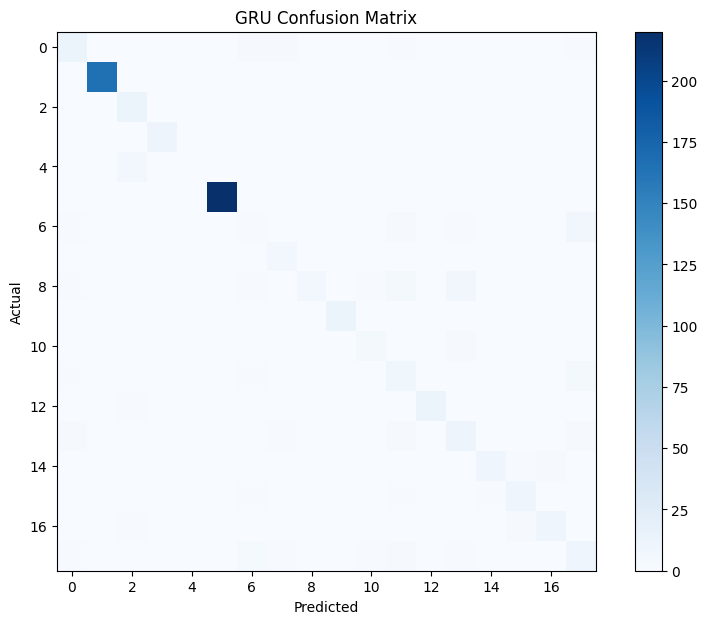

NameError: name 'test_acc' is not defined

In [ ]:
# -----------------------
# Build GRU
# -----------------------
def build_gru(window, n_features, n_classes):
    model = models.Sequential([
        layers.Input(shape=(window, n_features)),
        layers.GRU(64, return_sequences=False),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.3),
        layers.Dense(n_classes, activation="softmax")
    ])
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

gru_model = build_gru(window=X_train.shape[1], n_features=X_train.shape[2], n_classes=len(classes))

# -----------------------
# Train GRU
# -----------------------
early_stop = callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True)

history_gru = gru_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# -----------------------
# Evaluate GRU
# -----------------------
y_val_pred = gru_model.predict(X_val).argmax(axis=1)
val_acc = accuracy_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred, average="macro")

print("\n✅ GRU Results")
print("Accuracy:", val_acc)
print("Macro-F1:", val_f1)
print(classification_report(y_val, y_val_pred, target_names=classes, zero_division=0))

cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(10,7))
plt.imshow(cm, cmap="Blues")
plt.title("GRU Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

# -----------------------
# Save Model + Results
# -----------------------

# Save model in recommended format
gru_model.save("gru_model.keras")

# Collect results
results = {
    "accuracy": test_acc,
    "macro_f1": test_f1,
    "report": report
}

# Save metrics
import json
with open("results_gru.json", "w") as f:
    json.dump(results, f, indent=4)

print("✅ GRU model + results saved")

In [ ]:
import json


In [ ]:
# Setup Git (first time only per machine)
!git config --global user.email "your_email@example.com"
!git config --global user.name "your_name"

# Save current notebook (from Colab)
!jupyter nbconvert --to notebook --execute my_notebook.ipynb --output trained_notebook.ipynb

# Push to GitHub
!git init
!git remote add origin https://github.com/USERNAME/REPO.git
!git add .
!git commit -m "Save DL model results"
!git branch -M main
!git push -u origin main
